In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Xử lý dữ liệu
df = pd.read_csv('./cleaned_data.csv')


In [119]:

# df = df
X,Y = df.iloc[:,0:23], df.iloc[:,23]
print(X.shape, Y.shape)
print(X.columns)
# print(df.isnull().sum()) # not null
# print(X.iloc[:,1])

(25000, 23) (25000,)
Index(['Unnamed: 0', 'applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level',
       'bmi', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'Student', 'Business', '150 to 175',
       '200 to 225', '175 to 200', '225 to 250'],
      dtype='object')


In [ ]:
def sum(x):
    s = 0
    for i in range(len(x)):
        s = s + x[i]
    return s

def mean(x):
    return sum(x)/len(x)
    
def covariance1(x,y):
    s = 0
    mean_x = mean(x)
    mean_y = mean(y)
    for i in range(len(x)):
        s = s + (x[i]-mean_x)*(y[i]-mean_y)
    return s/(len(x)-1)

# def covariance(x,y):
#     return np.cov(x,y)

def correlation(x,y):
    std_x = covariance1(x,x)
    std_y = covariance1(y,y)
    return covariance1(x,y)/np.sqrt((std_x*std_y))

corr={}

for i in range(len(X.columns)):
    # print(X.columns[i],covariance1(X.iloc[:,i],Y),correlation(X.iloc[:,i],Y))
    cur=[]
    for j in range(len(X.columns)):
        cur.append(correlation(X.iloc[:,i],X.iloc[:,j]))
    cur.append(correlation(X.iloc[:,i],Y))
    corr[X.columns[i]]=cur

cur = []
for i in range(len(X.columns)):
    # print(X.columns[i],corr[X.columns[i]])
    cur.append(correlation(X.iloc[:,i],Y))
cur.append(correlation(Y,Y))
corr['Y']=cur


# corr=df.corr()
# # print(df.corr())



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#paint correlation
corr = pd.DataFrame(corr,columns=corr.keys(),index=corr.keys())
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1, linecolor='white', fmt='.2f',ax=ax)
plt.show()

NameError: name 'corr' is not defined

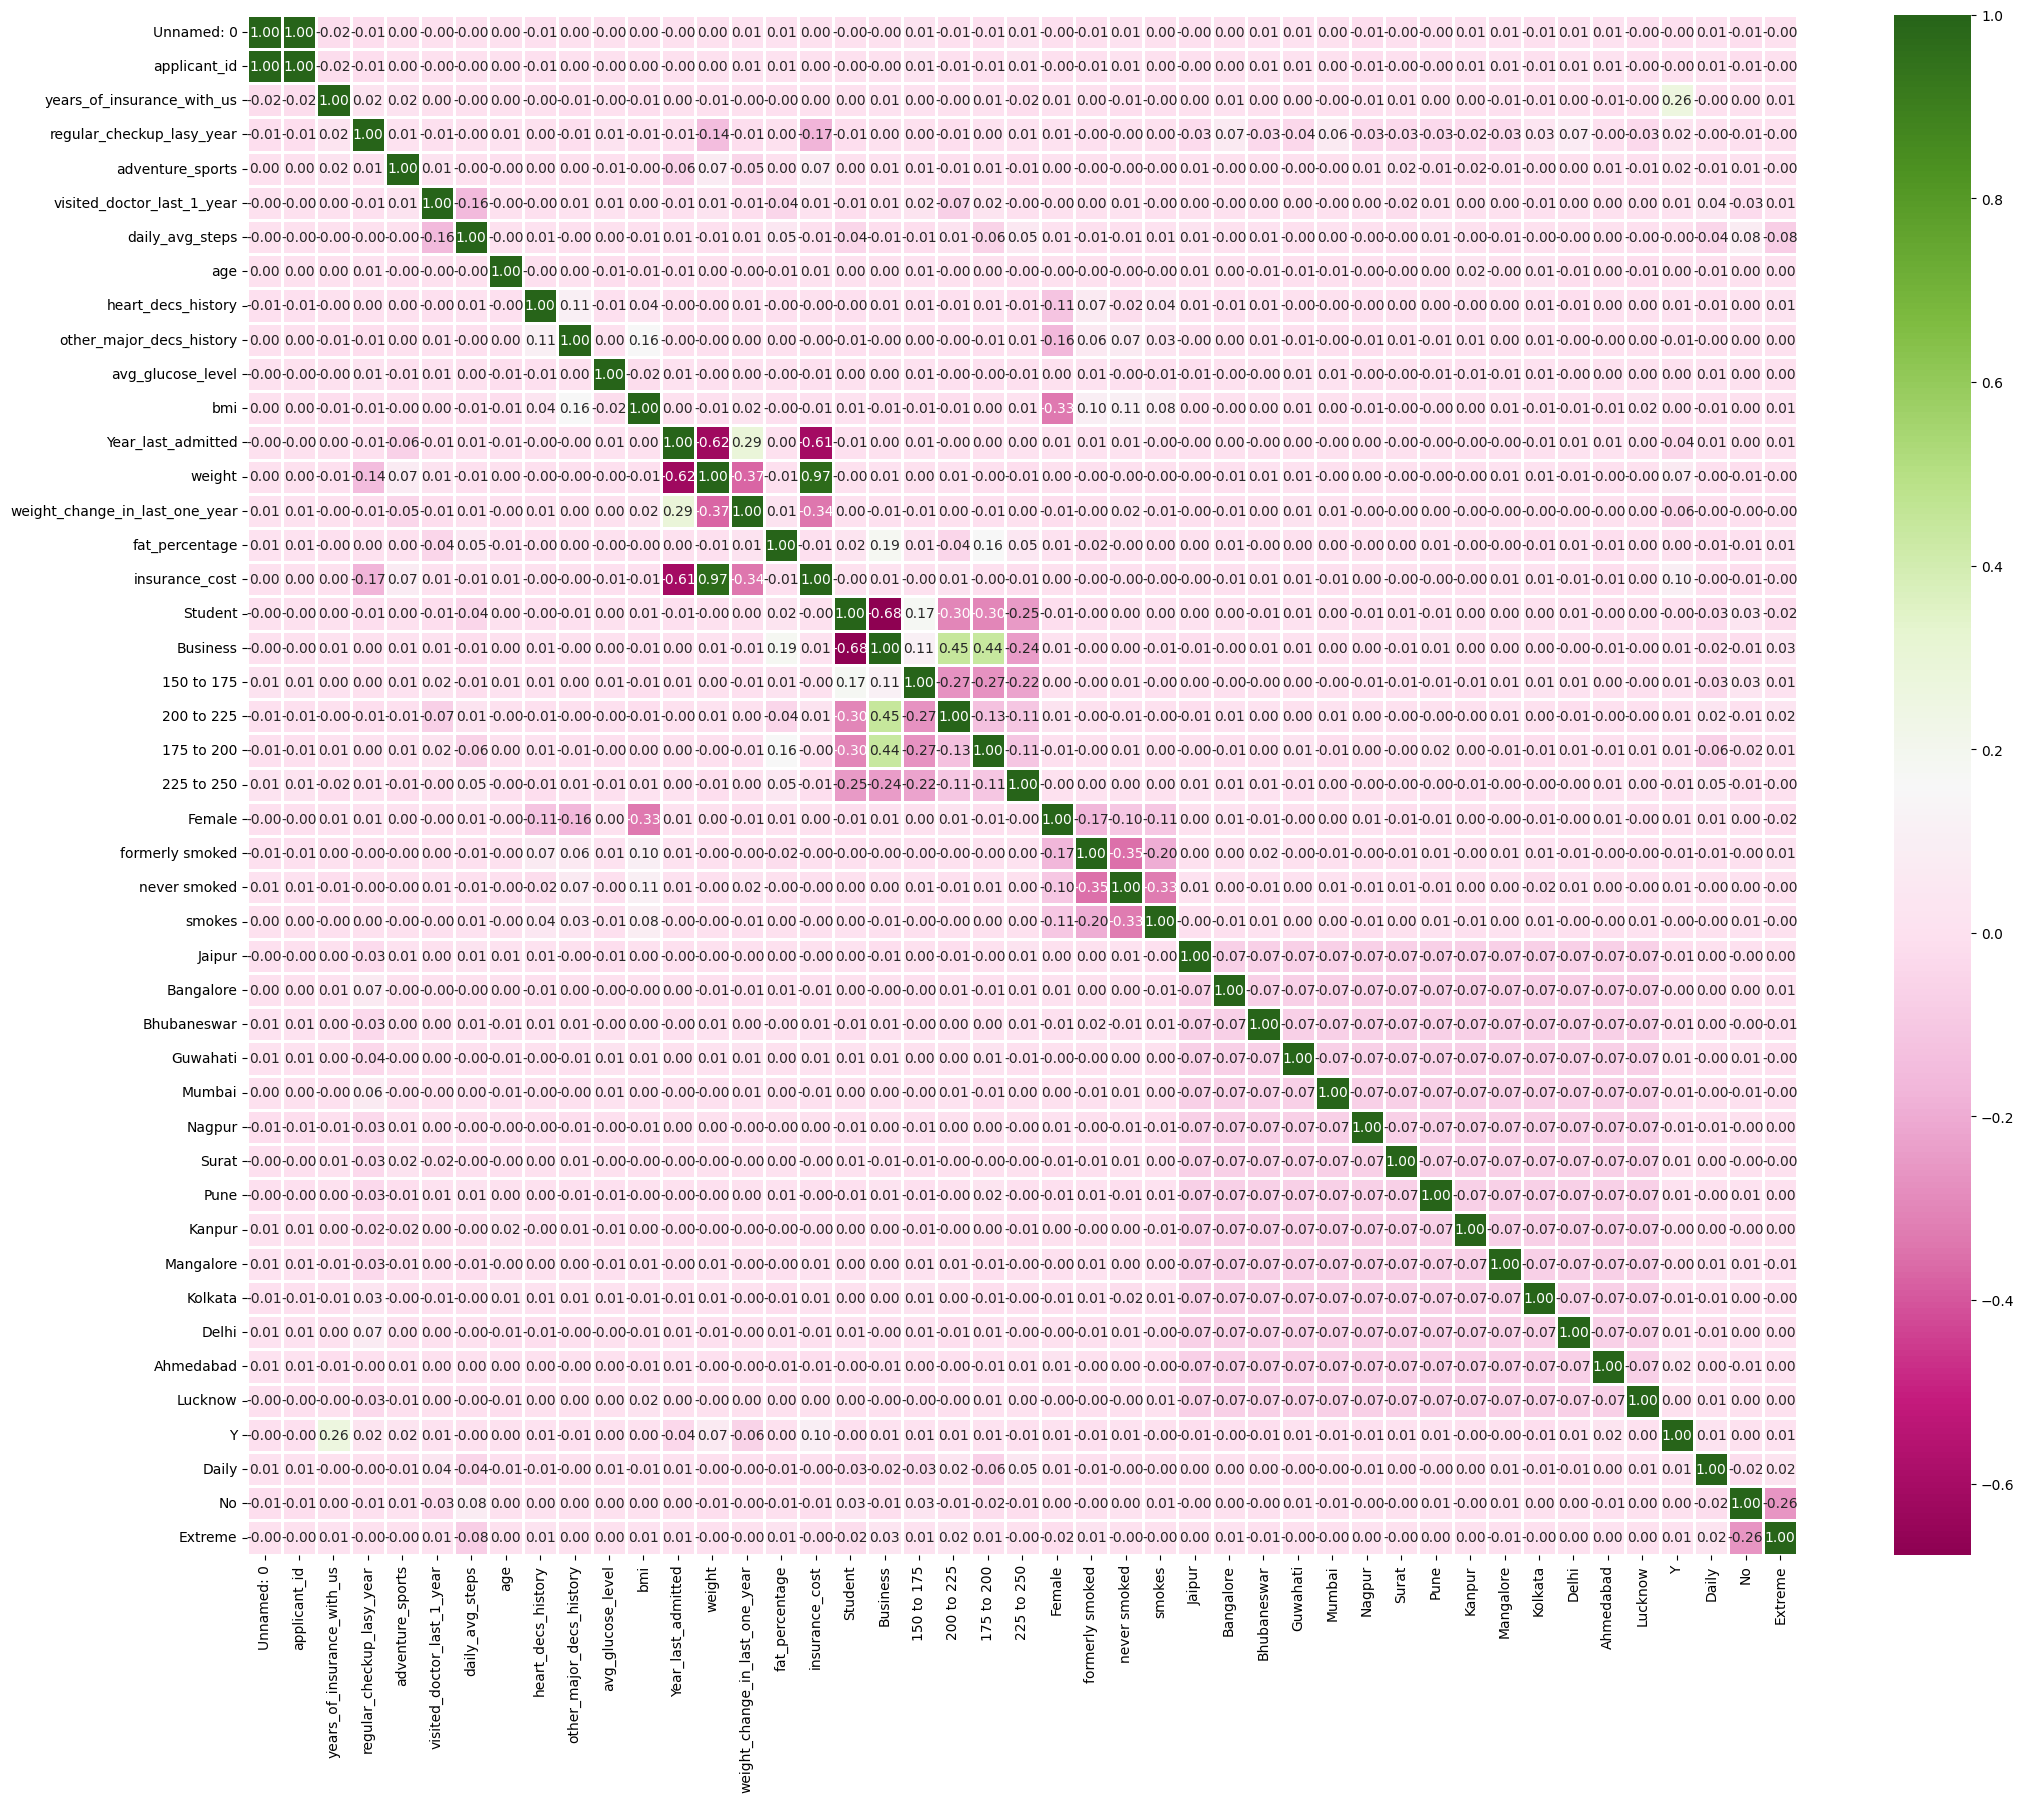

In [120]:
corr1= df.corr()
# print(df.corr())
corr1.to_csv("./corr.csv")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#paint correlation
corr = pd.DataFrame(corr1,columns=corr1.keys(),index=corr1.keys())
fig, ax = plt.subplots(figsize=(25,20))  
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1, linecolor='white', fmt='.2f',ax=ax)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        # error = 0
        # for i in range(len(y)):
            # error += (y[i] - y_hat[i]) ** 2
        # return error / len(y)
        return np.mean((y - y_hat) ** 2)
    
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        # self.weights = np.zeros(X.shape[1])
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()
        
        # 2. Perform gradient descent
        N = X.shape[0]
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / N) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / N) * (2 * np.sum(y_hat - y))
            
            # print(partial_w, partial_d)
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
    
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias


In [43]:
df = pd.read_csv('./cleaned_data.csv')
Y = df['insurance_cost']
X_drop = df[['weight_change_in_last_one_year','weight','Year_last_admitted']]

Y = df['insurance_cost']
print(X_drop)
# X_notdrop = X
# print(X_drop.columns)

X_train,X_test,Y_train,Y_test = train_test_split(X_drop,Y,test_size=0.3,random_state=0)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=0)
print(X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)


model = LinearRegression(learning_rate=0.01,n_iterations=15000)
model.fit(np.array(X_train),np.array(Y_train))
# yhat = model.predict(X_test)

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,Y_train)

       weight_change_in_last_one_year    weight  Year_last_admitted
0                            0.166667  0.340909            0.500000
1                            0.500000  0.136364            0.500000
2                            0.000000  0.477273            0.500000
3                            0.500000  0.431818            0.500000
4                            0.000000  0.500000            0.500000
...                               ...       ...                 ...
24995                        0.666667  0.613636            0.357143
24996                        0.333333  0.318182            0.678571
24997                        0.166667  0.545455            0.500000
24998                        0.000000  0.500000            0.500000
24999                        0.666667  0.113636            0.857143

[25000 rows x 3 columns]
(17500, 3) (3750, 3) (3750, 3) (17500,) (3750,) (3750,)


In [44]:
# predict = pd.DataFrame({'predict':yhat,'actual':Y_test})
# predict.to_csv("./predict.csv")
print(model.weights)
print(model.bias)
yhat = model.predict(X_test)
print(yhat)
print(Y_test)
print(r2_score(Y_test, yhat))

[  957.43645561 64513.69527298 -1800.20546428]
-1110.089524164022
[35124.03464933 20302.2584356  25750.39487227 ... 31712.8757273
 50012.42369164 25662.9954851 ]
16870    39488
24802    18510
14251    25914
15902    24680
5107     39488
         ...  
11639    23446
21022     8638
13767    33318
3512     53062
21652    27148
Name: insurance_cost, Length: 3750, dtype: int64
0.9441753370271807


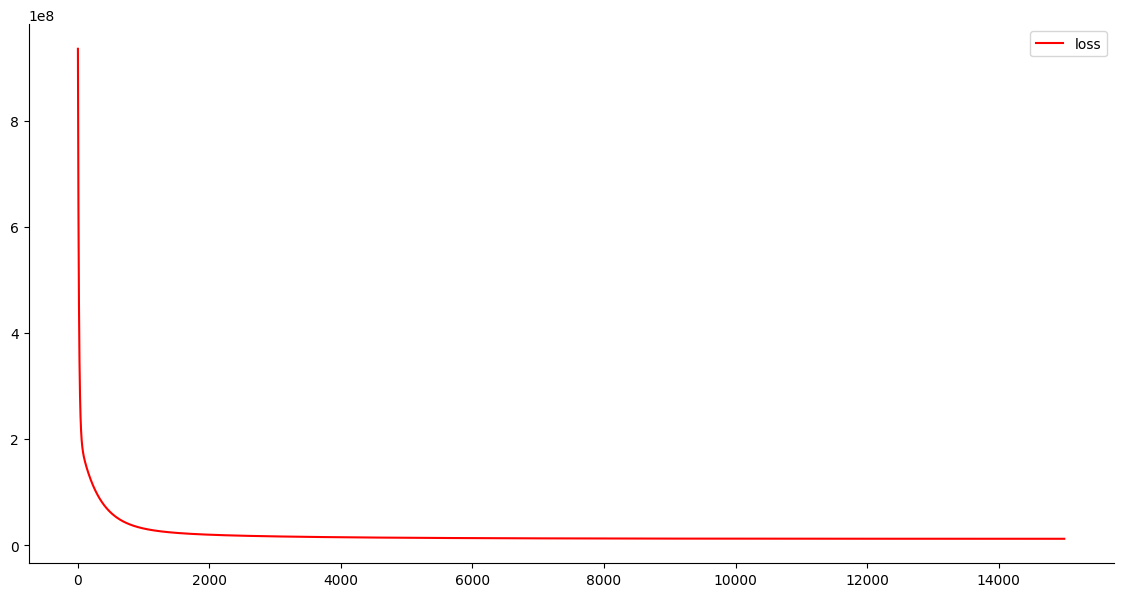

In [45]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(1000,1000))
plt.plot(model.loss,label='loss',color='red')
plt.legend()
plt.savefig("./loss.png")
plt.show()

In [24]:
# mean absolute error
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

actualAndPredict = pd.DataFrame({'predict':yhat,'actual':Y_test})
actualAndPredict.to_csv("./actualAndPredict.csv")